

## Here we going to implement softmax Regression using Gradient Descent, We will classifie digits from the MINST data.

first of all, we will import all the python packages -

In [48]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import ssl
import joblib
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

Now, we will retrieve the MNIST dataset, which consists of 28x28 pixel grayscale images of handwritten digits. This will be done using scikit-learn's fetch_openml function. Following this, we will preprocess the data by incorporating a bias term into the feature matrix and dividing it into training (60,000 samples) and testing (10,000 samples) sets. To facilitate their use in softmax regression model, categorical labels will be converted to one-hot encoding.
Additionally, the feature vectors in the X matrix have been normalized to solve potential issues related to numerical stability.

In [49]:
# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')
# Access features (pixel values) and labels
X, y = mnist['data'], mnist.target

# adding one to the X for bias and changing to a numpy array
X = np.append(X, np.ones([len(X), 1]), 1)
# Normalizing X for Numerical Stability
X = X / 255
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, train_size=60000)
# Convert categorical labels to one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)
# Convert to a numpy array
y_train_one_hot_np = np.array(y_train_one_hot)
y_test_one_hot_np = np.array(y_test_one_hot)

firstly, we will write a function that we will call softmax that will give us our K estimated probabilites, when K is the number of digits(10), like in the mman instructions that we can see here -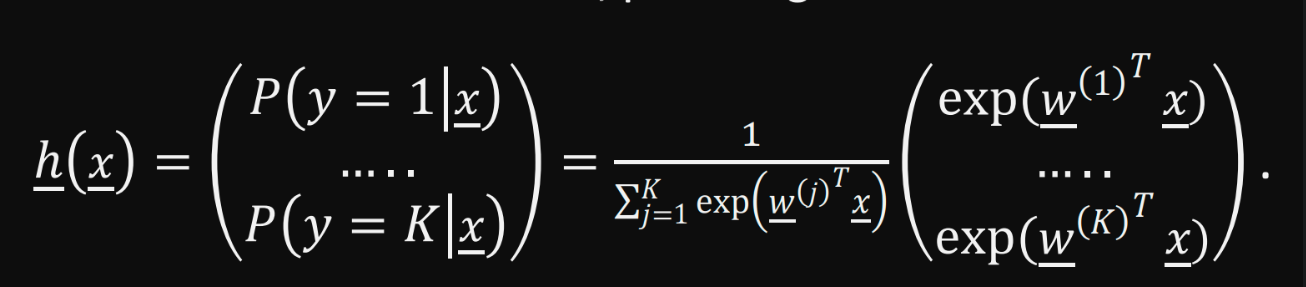


In [50]:
def SoftMax(w_classifiers, X):
    # Calculate the scores for each class
    predict_scores = X @ w_classifiers

    # Compute the exponentials of the scores
    exps_matrix = np.exp(predict_scores)

    # Sum the exponentials along each row to get the denominator for normalization
    summary = np.sum(exps_matrix, axis=1, keepdims=True)

    # Compute the softmax probabilities by normalizing the exponentials
    softmax_probabilities = exps_matrix / summary

    return softmax_probabilities

In this section, I define the Cost/Ein function, representing the cross-entropy loss between predicted probabilities and true labels. This function quantifies the dissimilarity, aiming to be minimized during training using Gradient Descent. I add a small epsilon value to prevent dividing in zero. Averaging over all samples scales the loss for easier interpretation and comparison across experiments.
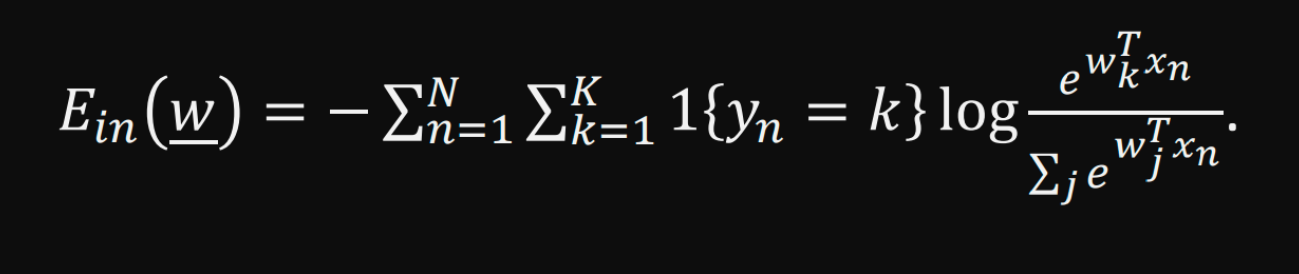

In [51]:
def EinFunction(predictions,y):
    small_number = 1e-6
    return -np.mean((np.sum((np.log(predictions+ small_number)) * y, axis=1)))


In this cell, we will define the one iteration in our gradient descent approach.
we know that the gradient is -
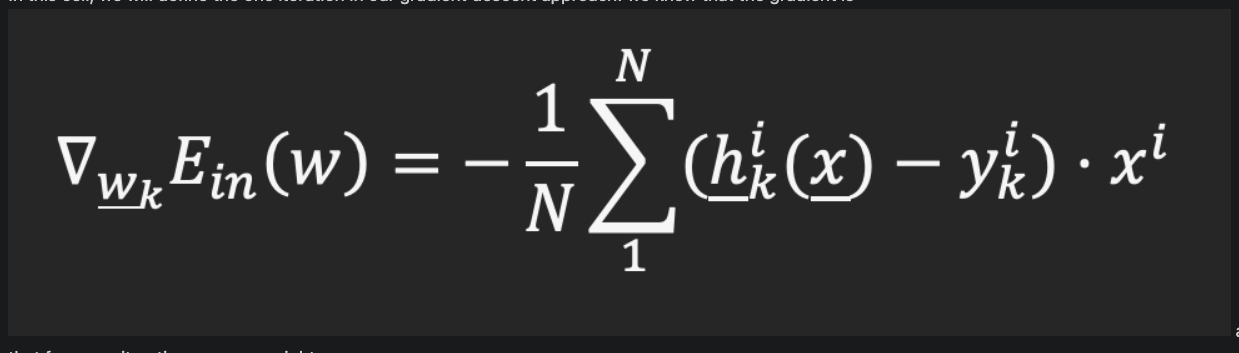

and we know that for every iteration our new weights are -





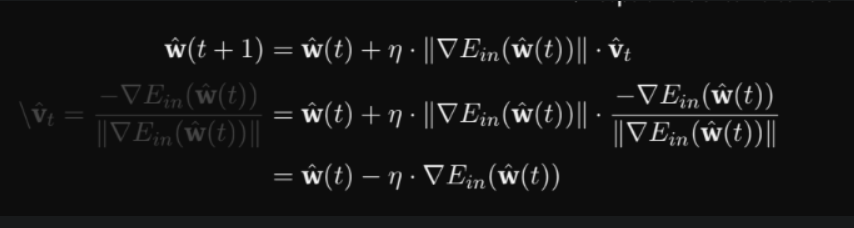
so the implementation in code -

In [52]:
def OneGradientStep(predictions, learning_rate, w_classifiers, y, x):
    diff = predictions - y

    gradient = (1 / X_train.shape[0]) * x.T.dot(diff)
    w_classifiers -= learning_rate * gradient
    return w_classifiers

# Softmax Regression Classifier Prediction

like in the Perceptron, our prediction will be with the classifier that gives us the higest score.
we will use argmax again.

In [53]:
def Prediction(predictions):
    y_index = np.argmax(predictions, axis = 1)
    return y_index

now we will use all the functions we defined below for the classifcation

In [54]:
# Initialize the weight matrix for the softmax classifier
w_classifiers = np.zeros([X_train.shape[1], 10])

training_errors_per_epoch = []  # To store the value of the loss function of the training data at each epoch for visualization later.
test_errors_per_epoch = []  # To store the value of the loss function of test data at each epoch for visualization later.

def SoftMax_Regression(learning_rate, epochs):
    """
    Perform softmax regression using gradient descent to minimize the cross-entropy loss.

    Parameters:
    - learning_rate (float): Step size for the gradient descent updates.
    - epochs (int): Number of iterations over the entire dataset.

    Returns:
    - None: Updates the weights of the softmax classifier in-place.
    """


    # Iterate over the specified number of epochs
    for epoch in range(epochs):

        # Compute softmax predictions for the training set
        predictions = SoftMax(w_classifiers, X_train)
        # Calculate the cross-entropy loss for the current predictions of training data for visulization
        training_errors_per_epoch.append(EinFunction(predictions, y_train_one_hot_np))

        # Compute softmax predictions for the test set
        test_predictions = SoftMax(w_classifiers, X_test)
        # Calculate the cross-entropy loss for the current predictions of training data for visulization
        test_errors_per_epoch.append(EinFunction(test_predictions, y_test_one_hot_np))

        # Update the weights using gradient descent
        OneGradientStep(predictions, learning_rate, w_classifiers, y_train_one_hot_np, X_train)

    # Compute final softmax predictions after training
    p_hat = SoftMax(w_classifiers, X_train)

    # Make predictions and calculate accuracy on the training set
    pred = Prediction(p_hat)
    accuracy = np.mean(pred == np.argmax(y_train_one_hot_np, axis=1))

# Run the regression with learning rate 0.1 and 500 epochs
SoftMax_Regression(0.1,500)

# Plotting Cross-Entropy Loss function
Next, we visualize the progression of the Cross-Entropy Loss function during model training and testing. This assessment aims to evaluate:

*   Convergence: Has the model successfully learned to minimize the loss on both training and test data?
*   Generalization: Does the model exhibit similar loss patterns for unseen test data, suggesting good generalization capabilities?
*   Overfitting: Are there signs of overfitting, where loss on training data decreases significantly while test loss stagnates or worsens?



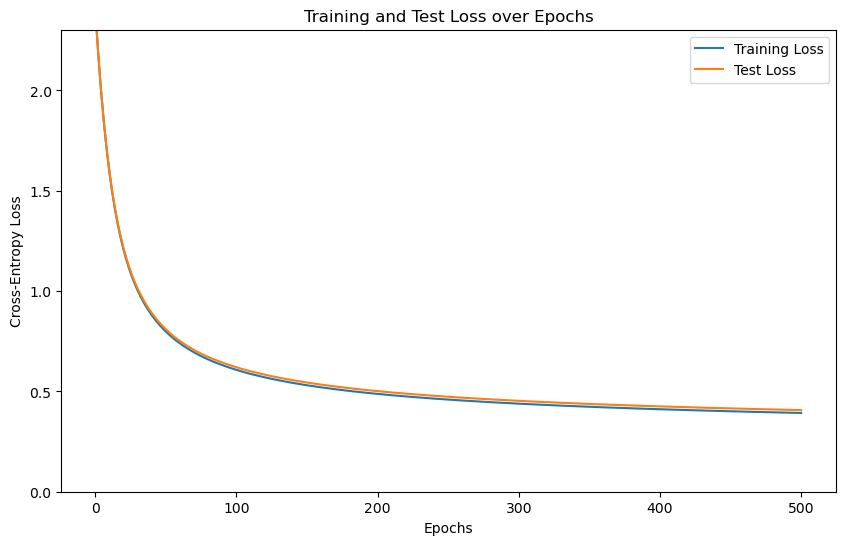

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 500 + 1), y=training_errors_per_epoch, label='Training Loss')
sns.lineplot(x=range(1, 500 + 1), y=test_errors_per_epoch, label='Test Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Test Loss over Epochs')
plt.ylim(0, max(max(training_errors_per_epoch), max(test_errors_per_epoch)))


# Display the legend
plt.legend()

# Show the plot
plt.show()

##Analyzing Convergence and Generalization through Loss Curves:


*   Convergence: From the visualized Cross-Entropy Loss curves, we observe both training and test losses converging around 200-300 epochs. This suggests that the model has successfully learned to minimize the loss on both seen and unseen data.

*   Generalization/Overfitting: The close alignment of training and test loss curves indicates good generalization capabilities. The model's performance translates well to unseen data, signifying it has captured the underlying patterns without simply memorizing the training set.


#Overall:
Observing the convergence and near-equal behavior of training and test loss curves provides strong evidence of the model's efficient learning and its ability to generalize well to unseen data. This suggests that the model fits this type of data effectively and avoids overfitting tendencies.



# Confusion Matrix For Multiclass Classifier -

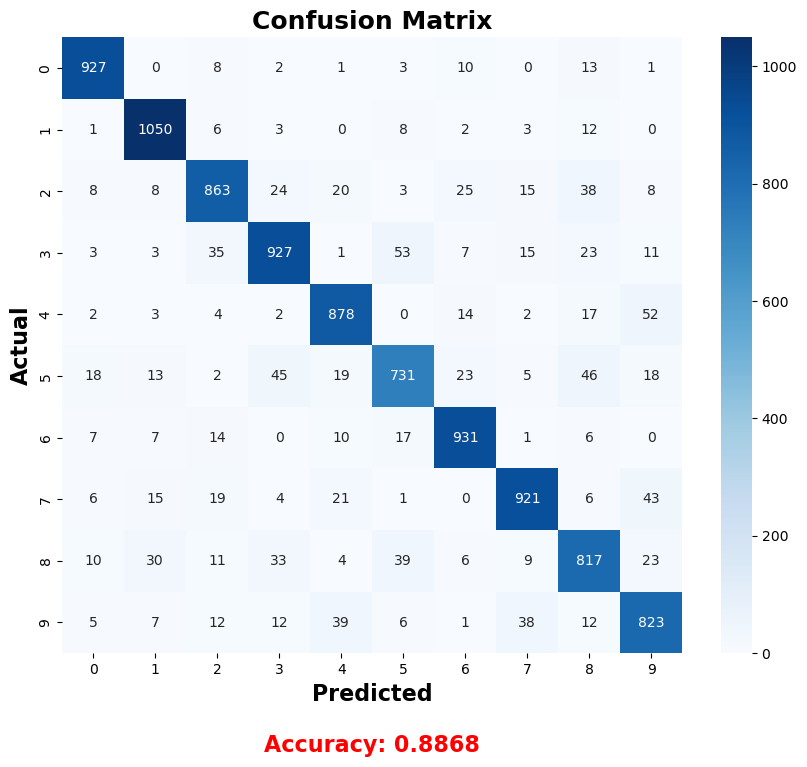

In [56]:

def get_confusion_matrix():
    confusion_matrix = np.zeros((10, 10), dtype=int)
    predictions = SoftMax(w_classifiers, X_test)

    # Iterating through each test example in X_test
    for i in range(X_test.shape[0]):

        # Determining the predicted digit by selecting the one with the highest score
        y_pred = np.argmax(predictions[i])

        # Extracting the actual digit from the one-hot encoded ground truth
        y_actual = np.argmax(y_test_one_hot_np[i])

        # Updating the confusion matrix based on the actual and predicted digits
        confusion_matrix[y_actual, y_pred] += 1

    # Returning the populated confusion matrix
    return confusion_matrix


def plot_confusion_matrix(confusion_matrix):

    # Get accuracy
    accuracy = np.trace(confusion_matrix) / len(X_test)
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.arange(10), yticklabels=np.arange(10))

    plt.xlabel('Predicted', fontsize=16, weight='bold')
    plt.ylabel('Actual', fontsize=16, weight='bold')
    plt.title('Confusion Matrix', fontsize=18, weight='bold')
    plt.text(5, 11.5, f"Accuracy: {accuracy:.4f}", ha='center', va='center', fontsize=16, color='red',fontweight='bold')

    plt.show()
plot_confusion_matrix(get_confusion_matrix())


The confusion matrix reveals encouraging performance from our Softmax model. The prominent blue diagonal blocks highlight its low rate of misclassifications, indicating it accurately predicts most digits. Compared to the Perceptron exercise, achieving superior results with similar or even shorter training time suggests Softmax's effectiveness with MNIST data.




## Confusion matrix for every digit -
To dig deeper into the model's classification behavior for each digit, we'll now visualize individual confusion matrices. This analysis employs a threshold of 0.5 to distinguish between predicted and actual classes for each digit.

Here's a breakdown of the process:

Apply Threshold: Each classifier's prediction output is binarised using a threshold of 0.5. Values above 0.5 are classified as the corresponding digit, while values below 0.5 are classified as not that digit.

Construct Matrices: A confusion matrix is created for each digit classifier, comparing its binary predictions against the true labels for that digit.

Visualize Patterns: These matrices reveal digit-specific insights, highlighting patterns of correct and incorrect classifications.

In [57]:
test_hat = SoftMax(w_classifiers, X_test)

# Create an empty array to store the thresholded predictions
thresholded_test_hat = np.zeros_like(test_hat)

# Apply the threshold to each value using a boolean mask
thresholded_test_hat[test_hat > 0.5] = 1
def get_digits_confusion_matrices():
  confusion_matrices = []
  for i in range(10):
    # Get true labels for the current digit

    # Get predicted labels for the current digit
    y_pred_digit = thresholded_test_hat[:, i]  # Use thresholded predictions
    y_true_digit = y_test_one_hot_np[:,i]
    # Calculate the confusion matrix for this digit
    true_positives = np.sum((y_true_digit == 1) & (y_pred_digit == 1))
    true_negatives = np.sum((y_true_digit == 0) & (y_pred_digit == 0))
    false_negatives = np.sum((y_true_digit == 1) & (y_pred_digit == 0))
    false_positives = np.sum((y_true_digit == 0) & (y_pred_digit == 1))
    accuracy = (true_positives + true_negatives) / (
            true_positives + true_negatives + false_positives + false_negatives)

    # Create confusion matrix as a numpy array
    confusion_matrix = np.array([[true_positives, false_positives],
                                 [false_negatives, true_negatives]])
    # Append the confusion matrix to the list
    confusion_matrices.append(confusion_matrix)
  return confusion_matrices


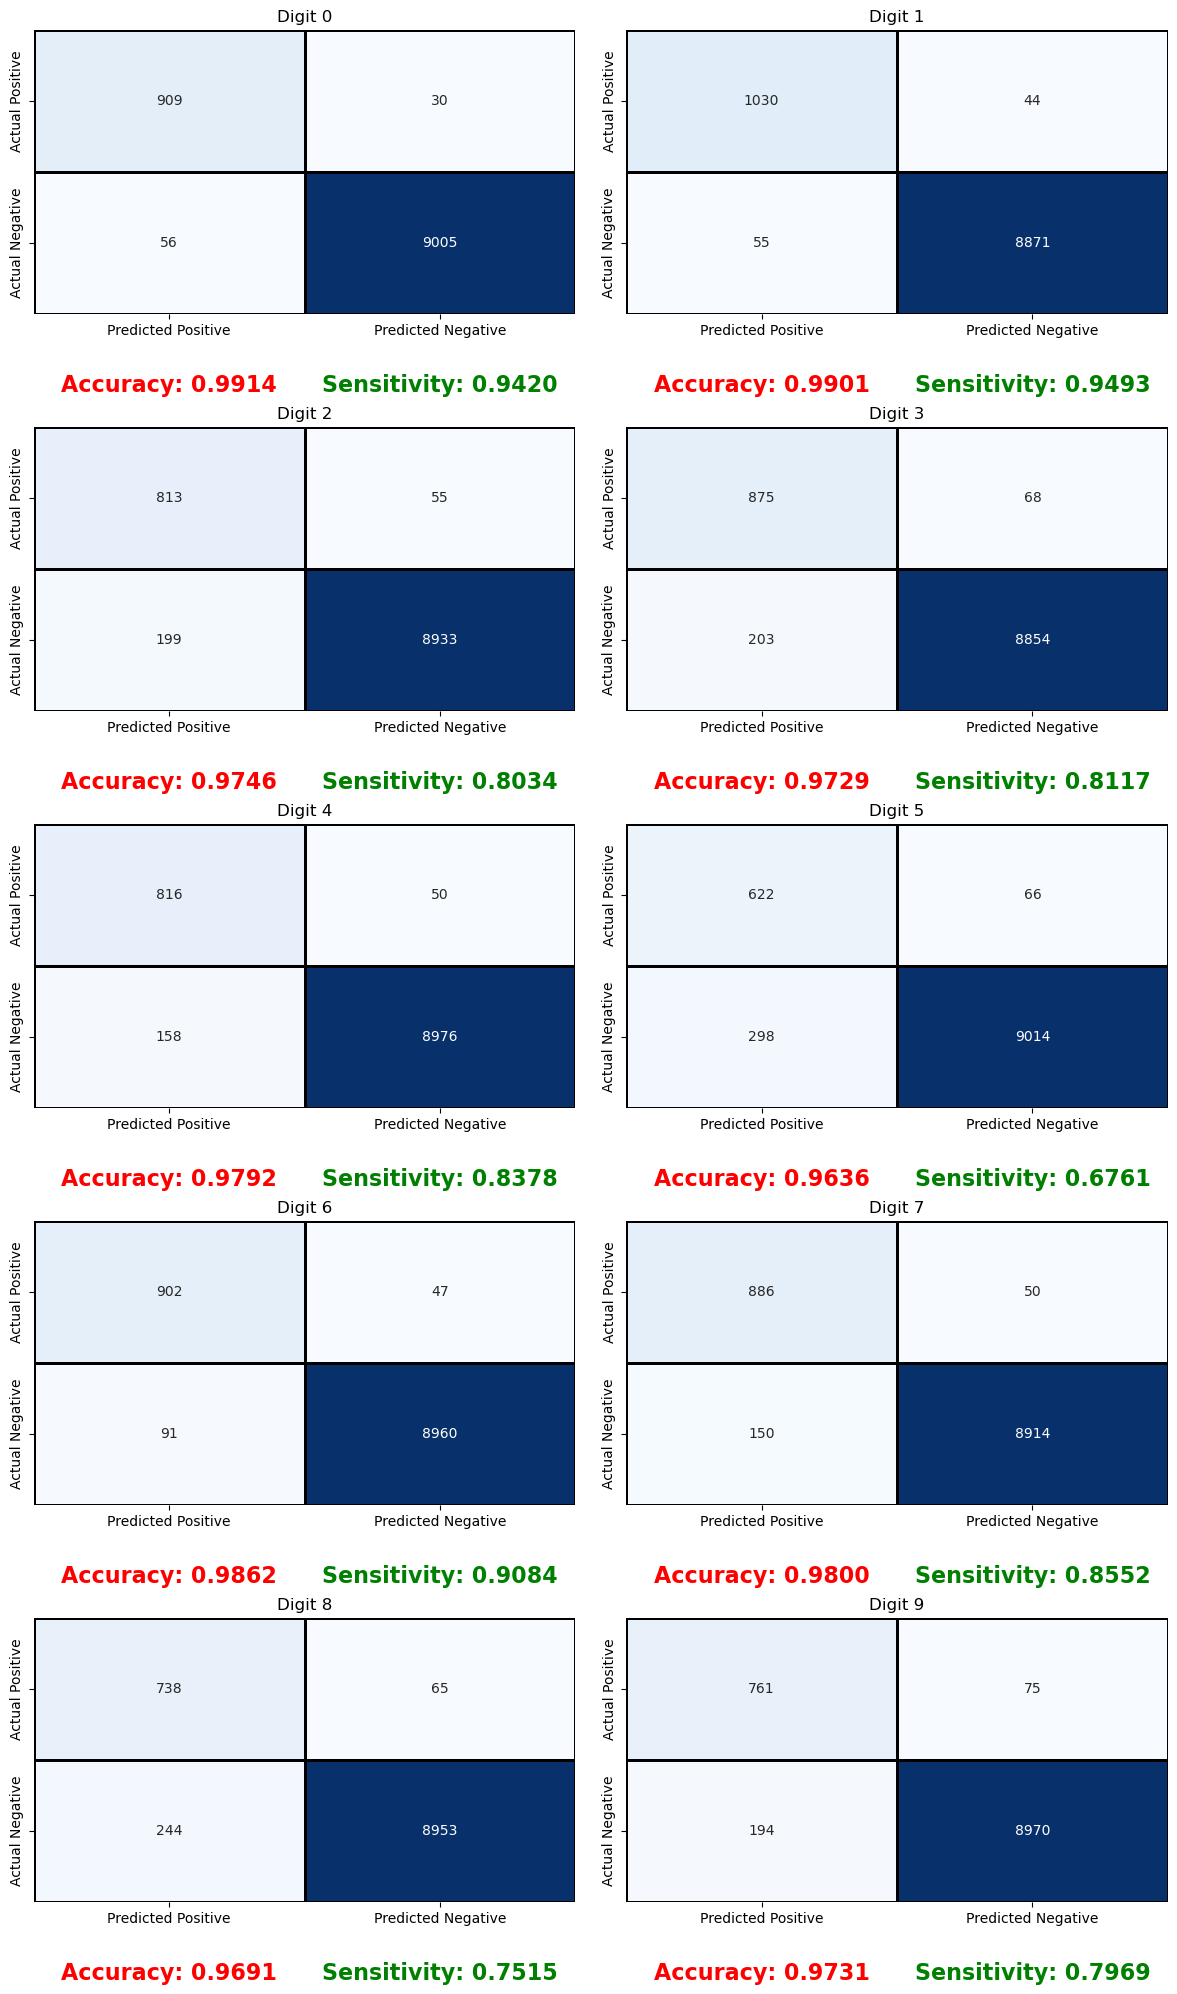

In [58]:
def confusion_matrix_visualization(confusion_matrices):
    fig, axes = plt.subplots(5, 2, figsize=(12, 20))

    for digit, cm in enumerate(confusion_matrices):
        row, col = divmod(digit, 2)

        # Plot confusion matrix as a heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Positive', 'Predicted Negative'],
                    yticklabels=['Actual Positive', 'Actual Negative'],
                    linewidths=1, linecolor='black', cbar=False, ax=axes[row, col])
        axes[row, col].set_title(f"Digit {digit}")
        # Calculate accuracy and sensitivity directly from the confusion matrix
        accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
        tpr = cm[0, 0] / (cm[0, 0] + cm[1, 0])


        # Add annotations for accuracy and sensitivity
        axes[row, col].text(0.5, 2.5, f"Accuracy: {accuracy:.4f}", ha='center', va='center', fontsize=16, color='red', fontweight='bold')
        axes[row, col].text(1.5, 2.5, f"Sensitivity: {tpr:.4f}", ha='center', va='center', fontsize=16, color='green', fontweight='bold')

    plt.tight_layout()
    plt.show()
confusion_matrix_visualization(get_digits_confusion_matrices())

In conclusion, the softmax regression model exhibits remarkable performance on the MNIST dataset. It consistently achieves an accuracy exceeding 95% for all digits, accompanied by a relatively high sensitivity. This is particularly noteworthy when contrasted with the previous exercise involving the perceptron. In the prior model, challenges arose with certain digits that proved difficult to recognize even for the human eye, such as 4 and 9. In the present softmax regression model, we observe a notable improvement in overcoming these recognition difficulties.


# Linear Regression
Now, we will implement a linear regression classifier. If the result is positive, it will predict 1; otherwise, it will predict -1, following the principles taught in class. To achieve this, we will utilize the np.linalg.pinv function and apply the formulas covered in our class sessions.

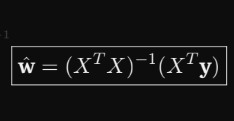

A brief note on np.linalg.pinv: The function calculates the pseudo-inverse of a matrix, providing a solution to linear systems even when the matrix is not of full rank. In our case, it plays a crucial role in deriving the weights for the linear regression model, allowing us to make predictions based on the learned patterns in the data(The data in MINST is NOT full rank).

In [59]:
def train_linear_model(linear_classifiers, digit):
    """
    Trains a linear model for a specific digit using pseudo-inverse.

    Parameters:
    - linear_classifiers (numpy.ndarray): Matrix storing linear classifiers for each digit.
    - digit (int): The digit for which the linear model is being trained.

    Returns:
    None: The function updates the linear_classifiers matrix in place.
    """

    # Compute the pseudo-inverse of the transpose of the training data matrix
    h = np.linalg.pinv(X_train.T @ X_train)

    # Compute the weights for the current digit using the pseudo-inverse
    h_hat = h @ X_train.T

    # Extract the labels for the current digit (1 for the current digit, -1 for others)
    cur_digit_y = np.where(y_train_one_hot_np[:, digit] == 1, 1, -1)

    # Update the linear classifiers with the computed weights for the current digit
    linear_classifiers[:, digit] = h_hat @ cur_digit_y


now we going to train all 10 classifiers

In [60]:
# Initialize a matrix to store linear classifiers for each digit
linear_classifiers = np.zeros([X_train.shape[1], 10])

# Loop through each digit (0 to 9) to train linear models
for digit in range(10):
    # Call the train_linear_model function to train the model for the current digit
    train_linear_model(linear_classifiers, digit)


plot the "big" confusion matrix like before -

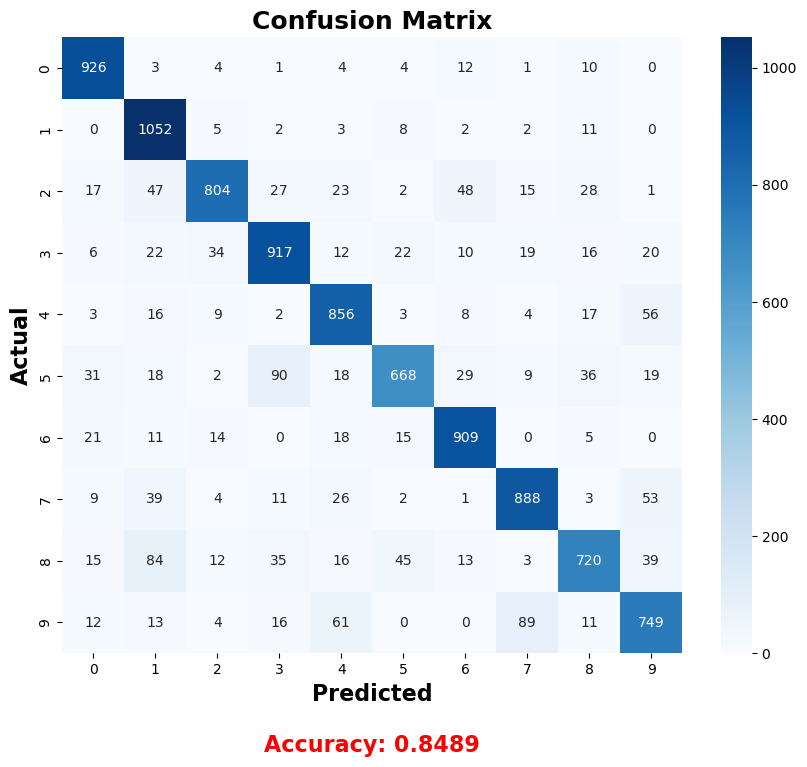

In [61]:

def get_confusion_matrix_linear():
    confusion_matrix = np.zeros((10, 10), dtype=int)
    predict_scores = X_test @ linear_classifiers

    # Iterating through each test example in X_test
    for i in range(X_test.shape[0]):

        # Determining the predicted digit by selecting the one with the highest score
        y_pred = np.argmax(predict_scores[i])

        # Extracting the actual digit from the one-hot encoded ground truth
        y_actual = np.argmax(y_test_one_hot_np[i])

        # Updating the confusion matrix based on the actual and predicted digits
        confusion_matrix[y_actual, y_pred] += 1

    # Returning the populated confusion matrix
    return confusion_matrix



plot_confusion_matrix(get_confusion_matrix_linear())


and now we will plot the confusion matrix for every digit

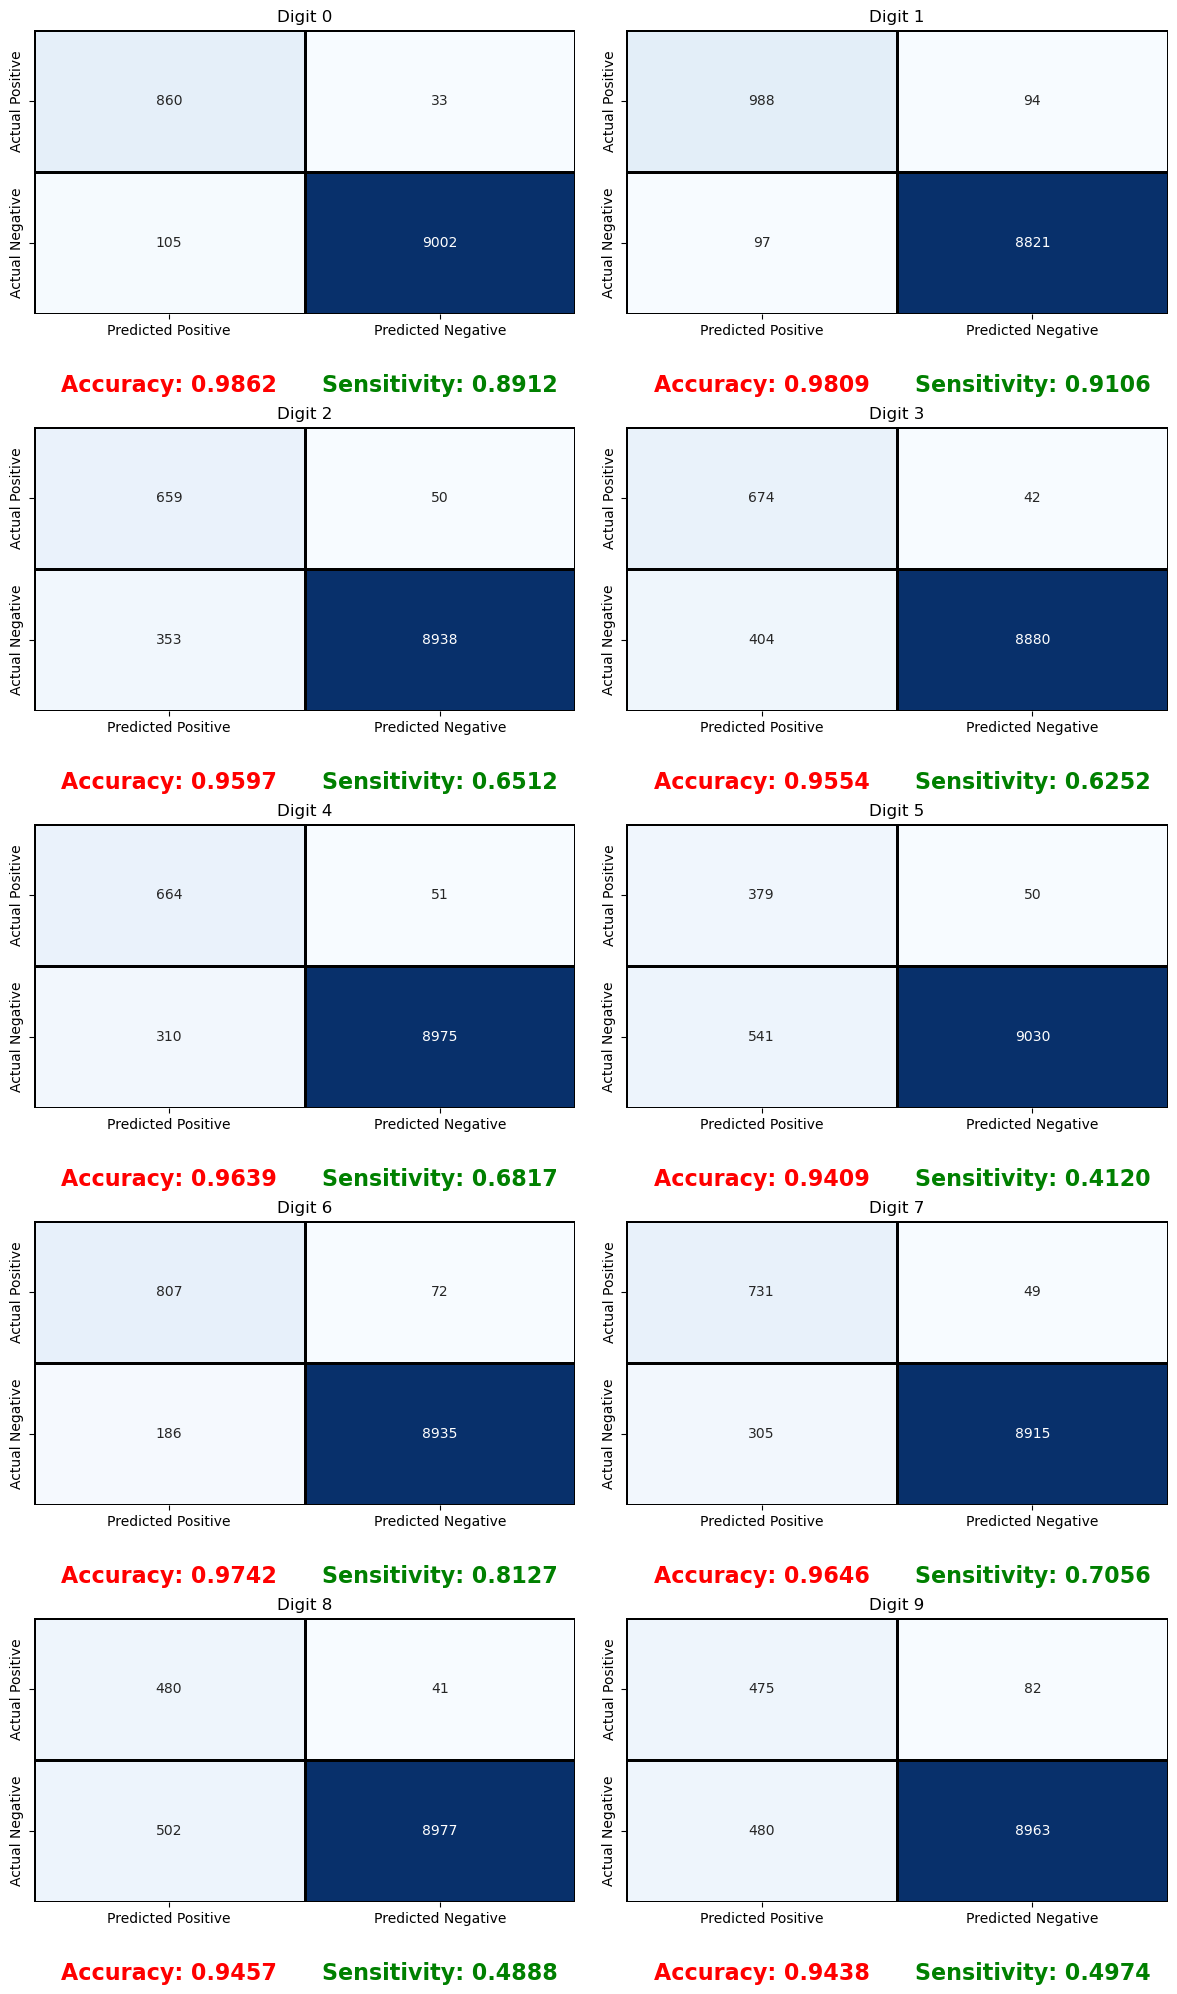

In [62]:
predict_scores = X_test @ linear_classifiers

def get_digits_confusion_matrices_linear():
  confusion_matrices = []
  for i in range(10):
    # Get true labels for the current digit
    signed_predict = np.sign(predict_scores)
    # Get predicted labels for the current digit
    y_pred_digit = signed_predict[:, i]
    y_pred_digit = np.where(y_pred_digit == -1, 0 , 1)
    y_true_digit = y_test_one_hot_np[:,i]
    # Calculate the confusion matrix for this digit
    true_positives = np.sum((y_true_digit == 1) & (y_pred_digit == 1))
    true_negatives = np.sum((y_true_digit == 0) & (y_pred_digit == 0))
    false_negatives = np.sum((y_true_digit == 1) & (y_pred_digit == 0))
    false_positives = np.sum((y_true_digit == 0) & (y_pred_digit == 1))
    accuracy = (true_positives + true_negatives) / (
            true_positives + true_negatives + false_positives + false_negatives)

    # Create confusion matrix as a numpy array
    confusion_matrix = np.array([[true_positives, false_positives],
                                 [false_negatives, true_negatives]])
    # Append the confusion matrix to the list
    confusion_matrices.append(confusion_matrix)
  return confusion_matrices
confusion_matrix_visualization(get_digits_confusion_matrices_linear())

# In conclusion, the application of linear regression for digit classification demonstrates its efficiency, yielding results in a remarkably short time (25 seconds) compared to the more time-consuming Softmax approach (3 and a half minutes). Despite the speed, the linear regression model achieves an accuracy of approximately 85%, aligning closely with the Softmax results. However, when examining individual digits, challenges arise with linear regression in comparison to Softmax. This disparity may stem from the fact that linear regression is primarily designed for prediction rather than classification. When treated as a binary classifier, distinct from the argmax approach applied to the comprehensive confusion matrix, the linear regression predictions exhibit a diminished sensitivity, indicating a less robust performance in capturing subtle distinctions among digits, particularly when contrasted with Softmax regression.

# Furthermore, both the linear regression and Softmax models perform better than the basic perceptron model in recognizing digits. They achieve higher accuracy and faster computation, showcasing their effectiveness over the simpler perceptron approach. 